Import headers and scripts

In [6]:
from import_data import *
from noise_models import *
from neural_network_with_bins import *
from Branch_flow_xy_split import *
# from generate_xy import *
import numpy as np
import matplotlib.pyplot as plt
# from volt_to_p_est import *
# from VI_to_P import *
# from linear_models import *
from feature_bins import std_bins_bflow
from IPython.display import clear_output

#%% importing single hour imag dataset
VM, VA, bflow, Pinj, Qinj, CFM, CFA, CTM, CTA = import_curr_branch_data()

Import data, get input- output combo

In [7]:
def data(addbus=[]):
#%% Getting X and Y 
    x_vm, x_va, x_cm, x_ca,  ytot = branch_flow_VI_split(bflow, VM, VA, CFM, CFA, CTM, CTA, Pinj, Qinj, num_bus = 11, add_bus = addbus)
    #%% Adding noise 
    x_vm_n = NoisyMag(x_vm)
    x_va_n = NoisyAng(x_va)
    # bflow_n = noise_gaussian(X, range1, mu1)
    # bflow_n = NoisyMag(x_bflow.values)
    x_cm_n = NoisyMag(x_cm)
    x_ca_n = NoisyAng(x_ca)

    # X_p = VI_to_P(x_vm_n, x_va_n, x_cm_n, x_ca_n, num_bus = 11, add_bus = [])
    X_v = np.concatenate((x_vm_n, x_va_n, x_cm_n, x_ca_n), axis=1)
    Y_p = ytot
    return X_v, Y_p

31.081381882947607 %
17.524034549921183 %
10.370536515007514 %
0.09084412905759946 %
0.06117598409355125 %


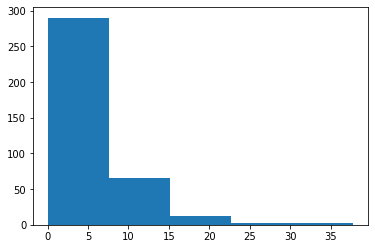

In [8]:
X,y = data()
std_b = [np.std(y[:,i]) for i in range(y.shape[1])]
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
# fig.suptitle('Histogram and bus wise std')
# ax1.hist(std_b, bins = 5)
# ax2.bar(np.arange(y.shape[1])+1, sorted(std_b))
branch_list = std_bins_bflow(std_b, 5)

Network 1: V_I input, V output 
Checking Power injection error

In [9]:
X_v, Y_p = data()
dnn = Deep_Network(layers=3, nodes=int(X_v.shape[1]*1.1), lr = 1e-3, epoch = 100,
                   batch_norm = True, dropout = 0, branch_list=branch_list)

# dnn.y_normalise = True
mse, mape, r2 = dnn.model_parse(X_v,Y_p,Pinj, Qinj, ntest=1)
clear_output()
np.mean(np.sqrt(mse))

4.904326338732083

In [20]:
np.mean(np.sqrt(mse[0][186*2+1:]))
# np.mean(r2)

7.456605569640155

In [ ]:
# # no need of this for now

# best_buses = [15, 104, 14, 49, 74, 106, 34, 88, 67, 92, 17, 27, 33, 98, 108, 60, 4, 11, 50, 41]
# bb2 = [100, 77, 59, 12, 40, 89, 49, 15, 80, 32, 75, 62, 110, 34, 94, 56, 85, 3, 19, 29, 45]
# rmse_full = []

# for i in range(1):
#     ad_bus = bb2[:len(best_buses)+1]
#     X, y = data(ad_bus)
#     dnn = Deep_Network(layers=3, nodes=int(X_v.shape[1]*1.25), lr = 3e-4, epoch = 200,
#                    batch_norm = False, dropout = 0, branch_list=branch_list)
#     mse, mape, r2 = dnn.model_parse(X,y,Pinj, Qinj, ntest=1)
    
#     rmse_full.append(np.mean(np.sqrt(mse)))
#     print('iteration', i, ' RMSE = ', rmse_full[-1])